In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Algorithme du simplexe

Qu'est-ce qu'une équation de droite dans le plan ?

C'est une équation du type $ax+by=c$

Par exemple, voici la droite d'équation $2x+3y=4$ :

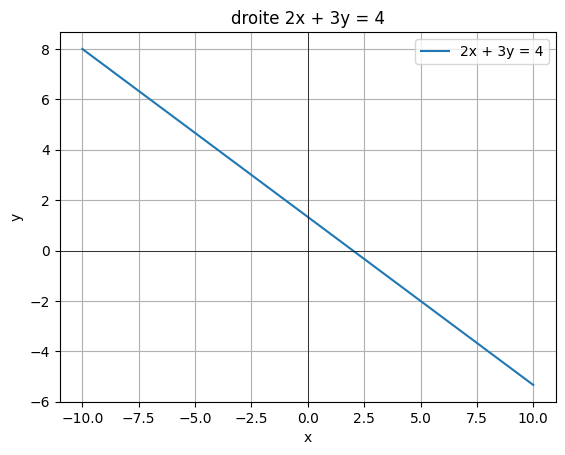

In [48]:
x = np.linspace(-10, 10, 400)
plt.plot(x,(4 -2*x)/3, label="2x + 3y = 4")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("droite 2x + 3y = 4")
plt.grid(True)
plt.legend()
plt.show()

De manière assez intuitive, l'inéquation $2x+3y \leq 4$ représente le demi-plan "en-dessous" de cette droite :

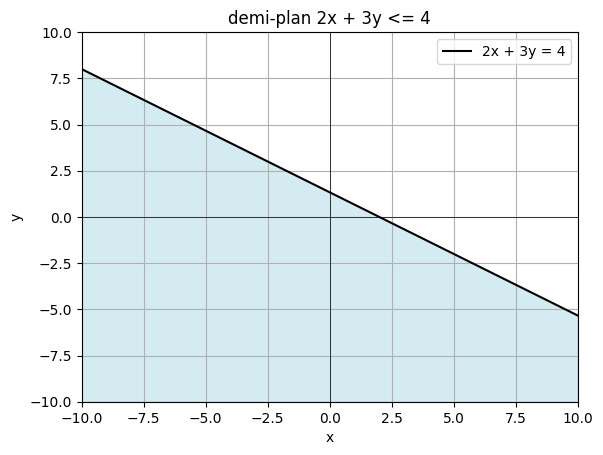

In [49]:
x = np.linspace(-10, 10, 400)
y = (4-2*x)/3

plt.plot(x, y, label="2x + 3y = 4", color='black')
plt.fill_between(x, y, y2=-10, where=(y >= -10), color='lightblue', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("demi-plan 2x + 3y <= 4")
plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


Prenons un autre exemple: voici la droite $y-x=3$

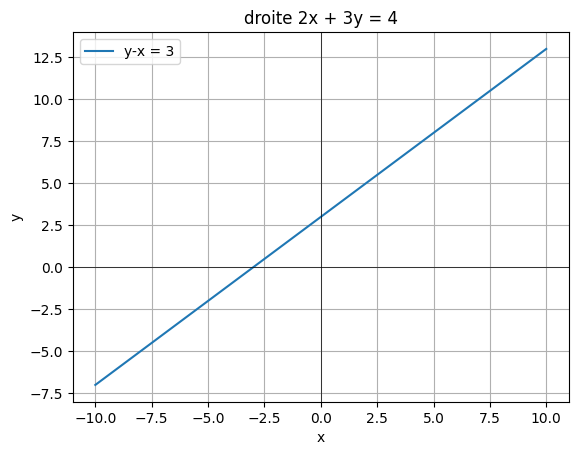

In [50]:
x = np.linspace(-10, 10, 400)
y=3+x

plt.plot(x, y, label="y-x = 3")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("droite 2x + 3y = 4")
plt.grid(True)
plt.legend()
plt.show()

De manière assez intuitive, l'inéquation $y-x \leq 3$ représente un demi-plan:

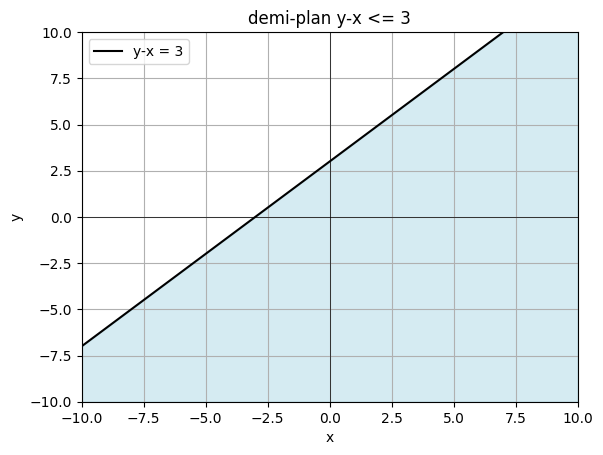

In [51]:
x = np.linspace(-10, 10, 400)
y=x+3

plt.plot(x, y, label="y-x = 3", color='black')
plt.fill_between(x, y, y2=-10, where=(y >= -10), color='lightblue', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("demi-plan y-x <= 3")
plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Par conséquent, l'ensemble $C=\{ (x, y) \in \mathbb{R}^2 \mid 2x + 3y \leq 4 \ \text{et} \ y - x \leq 3 \}$ est l'intersection des deux demi-plans représentés précédemment :

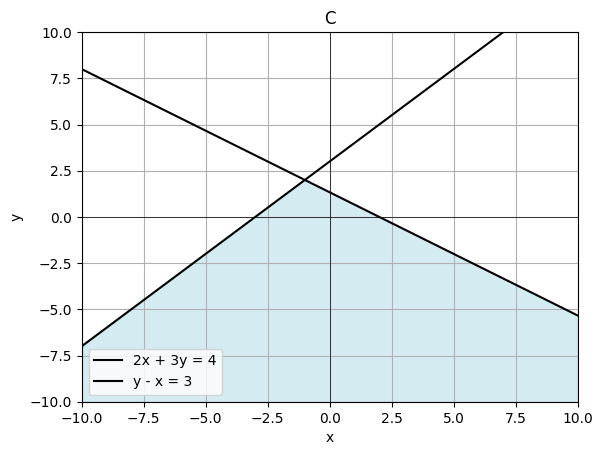

In [52]:
a1, b1, c1 = 2, 3, 4   # 2x + 3y = 4
a2, b2, c2 = -1, 1, 3  # y - x = 3


x = np.linspace(-10, 10, 400)
y1=(c1-a1*x)/b1
y2=(c2-a2*x)/b2


plt.plot(x, y1, label="2x + 3y = 4", color='black')
plt.plot(x, y2, label="y - x = 3", color='black')
plt.fill_between(x, np.minimum(y1, y2), y2=-10, color='lightblue', alpha=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("C")
plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()



Ensuite, on peut rajouter autant d'inéquations qu'on veut pour former un ensemble plus compliqué: par exemple $\{ (x, y) \in \mathbb{R}^2 \mid 2x + 3y \leq 4 \ \text{et} \ y - x \leq 3 \ \text{et} \ x-2y \geq 5 \ \text{et} \ y+x \geq 3\}$

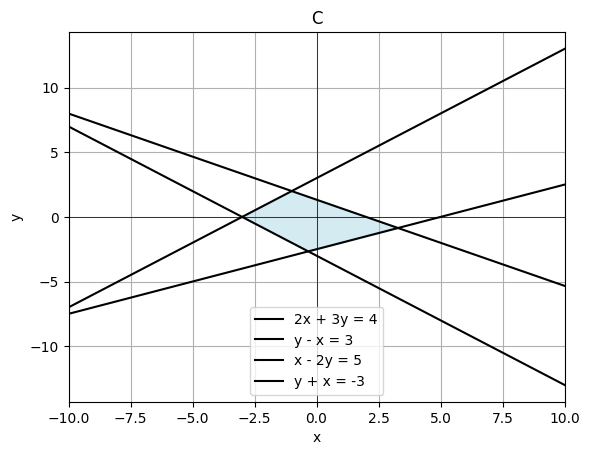

In [53]:
a1, b1, c1 = 2, 3, 4    # 2x + 3y <= 4
a2, b2, c2 = -1, 1, 3   # y - x <= 3
a3, b3, c3 = 1, -2, 5   # x - 2y >= 5
a4, b4, c4 = 1, 1, -3    # y + x >= 3

x = np.linspace(-10, 10, 400)
y1 = (c1 - a1*x)/b1       # y = (4 - 2x) / 3
y2 = (c2 - a2*x)/b2       # y = x + 3
y3 = (c3 - a3*x)/b3       # y = (x - 5) / 2
y4 = (c4 - a4*x)/b4       # y = 3 - x


plt.plot(x, y1, label="2x + 3y = 4", color='black')
plt.plot(x, y2, label="y - x = 3", color='black')
plt.plot(x, y3, label="x - 2y = 5", color='black')
plt.plot(x, y4, label="y + x = -3", color='black')
plt.fill_between(x, np.minimum(y1,y2),
                 np.maximum(y3, y4), where=(y2 >= y4) & (y1 >= y3), color='lightblue', alpha=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("C")
plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.show()


Maintenant, si on considère n'importe quel point $(x,y)$ de cet ensemble $C$, par exemple $(0,0)$, il se trouve à une certaine distance de chaque droite délimitante. Associons une grandeur $a$ à la première frontière, une grandeur $b$ à la seconde, $c$ à la troisième et $d$ à la quatrième. Cette grandeur est nulle si et seulement si le point est sur la frontière correspondante. Cette grandeur est toujours positive quand le point est dans le convexe $C$. A ce stade de la lecture, nous pouvons considérer qu'il s'agit d'un analogue de la "distance" du point à la frontière, mais attention: c'est seulement pédagogique, car ces grandeurs $a$, $b$, $c$ et $d$ appelées "variables d'écart" ne sont pas réellement égales à la distance euclidienne du point à la frontière.

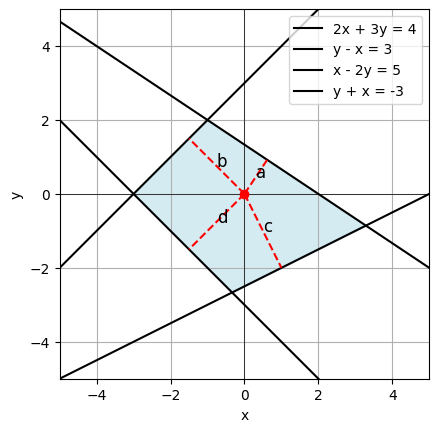

In [55]:
a1, b1, c1 = 2, 3, 4    # 2x + 3y = 4
a2, b2, c2 = -1, 1, 3   # y - x = 3
a3, b3, c3 = 1, -2, 5   # x - 2y = 5
a4, b4, c4 = 1, 1, -3   # y + x = -3

# Point rouge
x0 = 0
y0 = 0

# lambdas (coefficients de Lagrange de la minimisation)
# voir la feuille pdf où j'explique d'où sortent ces expressions
l1 = 2*(a1*x0+b1*y0-c1)/(a1**2+b1**2)
l2 = 2*(a2*x0+b2*y0-c2)/(a2**2+b2**2)
l3 = 2*(a3*x0+b3*y0-c3)/(a3**2+b3**2)
l4 = 2*(a4*x0+b4*y0-c4)/(a4**2+b4**2)


x = np.linspace(-10, 10, 400)
y1 = (c1 - a1 * x) / b1       # y = (4 - 2x) / 3
y2 = (c2 - a2 * x) / b2       # y = x + 3
y3 = (c3 - a3 * x) / b3       # y = (x - 5) / 2
y4 = (c4 - a4 * x) / b4       # y = -3 - x


plt.plot(x, y1, label="2x + 3y = 4", color='black')
plt.plot(x, y2, label="y - x = 3", color='black')
plt.plot(x, y3, label="x - 2y = 5", color='black')
plt.plot(x, y4, label="y + x = -3", color='black')
plt.fill_between(x, np.minimum(y1, y2),
                 np.maximum(y3, y4), where=(y2 >= y4) & (y1 >= y3), color='lightblue', alpha=0.5)

# Ajouter le point (2,0) en rouge
plt.scatter(x0, y0, color='red', zorder=5)

# Tracer les lignes pointillées
# a
plt.plot([x0, x0-l1*a1/2], [y0, y0-l1*b1/2], 'r--')
plt.text(x0-l1*a1/4, y0-l1*b1/4, "a", fontsize=12, color='black')

# b
plt.plot([x0, x0-l2*a2/2], [y0, y0-l2*b2/2], 'r--')
plt.text(x0-l2*a2/4, y0-l2*b2/4, "b", fontsize=12, color='black')

# c
plt.plot([x0, x0-l3*a3/2], [y0, y0-l3*b3/2], 'r--')
plt.text(x0-l3*a3/4, y0-l3*b3/4, "c", fontsize=12, color='black')

# d
plt.plot([x0, x0-l4*a4/2], [y0, y0-l4*b4/2], 'r--')
plt.text(x0-l4*a4/4, y0-l4*b4/4, "d", fontsize=12, color='black')

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Les variables d'écart (aussi appelées variables artificielles) $a, b, c$ et $d$ sont toujours $\geq 0$ car on ne s'intéresse qu'aux points à l'intérieur de la zone. Notons au passage que la zone délimitée par le polygone est appelée un "simplexe".

Lorsque le point est sur la droite, cela annule la variable d'écart correspondante. Par exemple, dans la situation ci-dessous, la variable d'écart $a=0$.

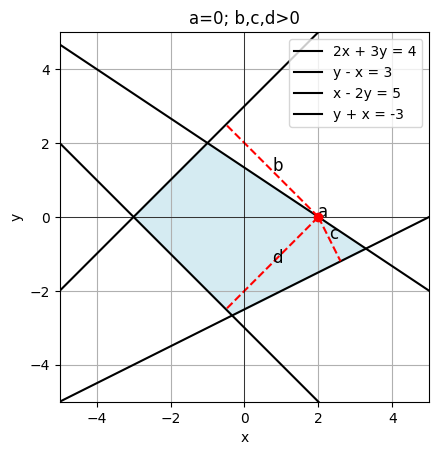

In [56]:
a1, b1, c1 = 2, 3, 4    # 2x + 3y = 4
a2, b2, c2 = -1, 1, 3   # y - x = 3
a3, b3, c3 = 1, -2, 5   # x - 2y = 5
a4, b4, c4 = 1, 1, -3   # y + x = -3

# Point rouge
x0 = 2
y0 = 0

# lambdas (coefficients de Lagrange de la minimisation)
l1 = 2*(a1*x0+b1*y0-c1)/(a1**2+b1**2)
l2 = 2*(a2*x0+b2*y0-c2)/(a2**2+b2**2)
l3 = 2*(a3*x0+b3*y0-c3)/(a3**2+b3**2)
l4 = 2*(a4*x0+b4*y0-c4)/(a4**2+b4**2)

x = np.linspace(-10, 10, 400)
y1 = (c1 - a1 * x) / b1       # y = (4 - 2x) / 3
y2 = (c2 - a2 * x) / b2       # y = x + 3
y3 = (c3 - a3 * x) / b3       # y = (x - 5) / 2
y4 = (c4 - a4 * x) / b4       # y = -3 - x

plt.plot(x, y1, label="2x + 3y = 4", color='black')
plt.plot(x, y2, label="y - x = 3", color='black')
plt.plot(x, y3, label="x - 2y = 5", color='black')
plt.plot(x, y4, label="y + x = -3", color='black')
plt.fill_between(x, np.minimum(y1, y2),
                 np.maximum(y3, y4), where=(y2 >= y4) & (y1 >= y3), color='lightblue', alpha=0.5)

# Ajouter le point (2,0) en rouge
plt.scatter(x0, y0, color='red', zorder=5)

# Tracer les lignes pointillées
# a
plt.plot([x0, x0-l1*a1/2], [y0, y0-l1*b1/2], 'r--')
plt.text(x0-l1*a1/4, y0-l1*b1/4, "a", fontsize=12, color='black')

# b
plt.plot([x0, x0-l2*a2/2], [y0, y0-l2*b2/2], 'r--')
plt.text(x0-l2*a2/4, y0-l2*b2/4, "b", fontsize=12, color='black')

# c
plt.plot([x0, x0-l3*a3/2], [y0, y0-l3*b3/2], 'r--')
plt.text(x0-l3*a3/4, y0-l3*b3/4, "c", fontsize=12, color='black')

# d
plt.plot([x0, x0-l4*a4/2], [y0, y0-l4*b4/2], 'r--')
plt.text(x0-l4*a4/4, y0-l4*b4/4, "d", fontsize=12, color='black')

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(r"a=0; b,c,d>0")
plt.grid(True)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Lorsque le point est sur un sommet du siplexe, cela annule les deux variables d'écart correspondantes.

Par exemple, si $(x,y)=(-3,0)$, cela veut dire qu'on est à l'intersection des droites n°2 et n°4, donc $b=d=0$.  

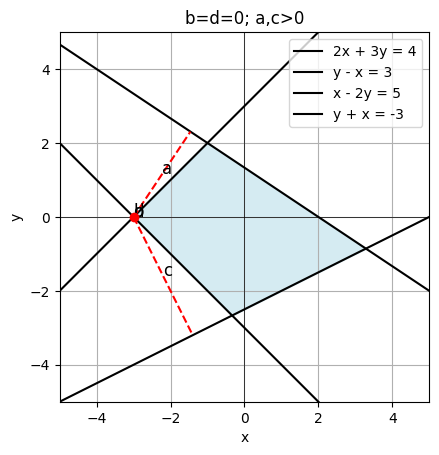

In [57]:
a1, b1, c1 = 2, 3, 4    # 2x + 3y = 4
a2, b2, c2 = -1, 1, 3   # y - x = 3
a3, b3, c3 = 1, -2, 5   # x - 2y = 5
a4, b4, c4 = 1, 1, -3   # y + x = -3

# Point rouge
x0 = -3
y0 = 0

# lambdas (coefficients de Lagrange de la minimisation)
l1 = 2*(a1*x0+b1*y0-c1)/(a1**2+b1**2)
l2 = 2*(a2*x0+b2*y0-c2)/(a2**2+b2**2)
l3 = 2*(a3*x0+b3*y0-c3)/(a3**2+b3**2)
l4 = 2*(a4*x0+b4*y0-c4)/(a4**2+b4**2)

x = np.linspace(-10, 10, 400)
y1 = (c1 - a1 * x) / b1       # y = (4 - 2x) / 3
y2 = (c2 - a2 * x) / b2       # y = x + 3
y3 = (c3 - a3 * x) / b3       # y = (x - 5) / 2
y4 = (c4 - a4 * x) / b4       # y = -3 - x

plt.plot(x, y1, label="2x + 3y = 4", color='black')
plt.plot(x, y2, label="y - x = 3", color='black')
plt.plot(x, y3, label="x - 2y = 5", color='black')
plt.plot(x, y4, label="y + x = -3", color='black')
plt.fill_between(x, np.minimum(y1, y2),
                 np.maximum(y3, y4), where=(y2 >= y4) & (y1 >= y3), color='lightblue', alpha=0.5)

# Ajouter le point (2,0) en rouge
plt.scatter(x0, y0, color='red', zorder=5)

# Tracer les lignes pointillées
# a
plt.plot([x0, x0-l1*a1/2], [y0, y0-l1*b1/2], 'r--')
plt.text(x0-l1*a1/4, y0-l1*b1/4, "a", fontsize=12, color='black')

# b
plt.plot([x0, x0-l2*a2/2], [y0, y0-l2*b2/2], 'r--')
plt.text(x0-l2*a2/4, y0-l2*b2/4, "b", fontsize=12, color='black')

# c
plt.plot([x0, x0-l3*a3/2], [y0, y0-l3*b3/2], 'r--')
plt.text(x0-l3*a3/4, y0-l3*b3/4, "c", fontsize=12, color='black')

# d
plt.plot([x0, x0-l4*a4/2], [y0, y0-l4*b4/2], 'r--')
plt.text(x0-l4*a4/4, y0-l4*b4/4, "d", fontsize=12, color='black')

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(r"b=d=0; a,c>0")
plt.grid(True)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Mathématiquement, les variables d'écart $a,b,c$ et $d$ vérifient:

$2x+3y+a=4$ \
$y-x+b=3$ \
$x-2y+c=5$ \
$y+x-d=-3$ \
$a,b,c,d \geq 0$

On observe que c'est un système à 4 équations avec 6 variables.

Il peut être matriciellement écrit sous la forme:

$
\begin{bmatrix}
2 & 3 & 1 & 0 \\
-1 & 1 & 0 & 0 \\
1 & -2 & 0 & 1 \\
1 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
a \\
c
\end{bmatrix}
=\begin{bmatrix}
4 \\
3-b \\
5 \\
-3+d
\end{bmatrix}
$

Vous remarquez qu'on a fait le choix d'isoler $b$ et $d$ en les mettant à droite. C'est un choix (c'est-à-dire qu'on aurait pu choisir d'isoler un autre couple de variables d'écart), mais on aurait été obligé dans tous les cas d'isoler deux variables, car il y a 2 variables de plus qu'il n'y a d'équations.

Nous pouvons inverser la matrice:

$
\begin{bmatrix}
x \\
y \\
a \\
c
\end{bmatrix}
={\begin{bmatrix}
2 & 3 & 1 & 0 \\
-1 & 1 & 0 & 0 \\
1 & -2 & 0 & 1 \\
1 & 1 & 0 & 0
\end{bmatrix}}^{-1}
\begin{bmatrix}
4 \\
3-b \\
5 \\
-3+d
\end{bmatrix}
$

Donc:

$
\begin{bmatrix}
x \\
y \\
a \\
c
\end{bmatrix}
=\begin{bmatrix}
0 & -1/2 & 0 & 1/2 \\
0 & 1/2 & 0 & 1/2 \\
1 & -1/2 & 0 & -5/2 \\
0 & 3/2 & 1 & 1/2
\end{bmatrix}
\begin{bmatrix}
4 \\
3-b \\
5 \\
-3+d
\end{bmatrix}
$

D'où:

$
\begin{bmatrix}
x \\
y \\
a \\
c
\end{bmatrix}
=\begin{bmatrix}
-\frac{1}{2}(3-b)+\frac{1}{2}(-3+d) \\
\frac{1}{2}(3-b)+\frac{1}{2}(-3+d) \\
4-\frac{1}{2}(3-b)-\frac{5}{2}(-3+d) \\
\frac{3}{2}(3-b)+5+\frac{1}{2}(-3+d)
\end{bmatrix}
$

D'où:

$
\begin{bmatrix}
x \\
y \\
a \\
c
\end{bmatrix}
=\begin{bmatrix}
-3+\frac{1}{2}b+\frac{1}{2}d \\
-\frac{1}{2}b+\frac{1}{2}d \\
10+\frac{1}{2}b-\frac{5}{2}d \\
8-\frac{3}{2}b+\frac{1}{2}d
\end{bmatrix}
$


**Remarque:** quand $b=d=0$, le système ci-dessus donne $x=-3, y=0, a=10$ et $c=8$. C'est cohérent avec la dernière figure montrée ($b=d=0; a,c>0$). Seulement, il y a un petit détail bizarre: $10>8$ alors que sur la figure, $a$ semble inférieur à $c$ ! Pourquoi ? Parce que **les variables ne représentent pas vraiment la distance du point à la frontière**. C'est une subtilité importante.

On peut facilement vérifier que les calculs sont cohérents en ajoutant les droites $2x+3y+10=4$ (soit $2x+3y=-6$) et $x-2y+8=5$ (soit $x-2y=-3$):

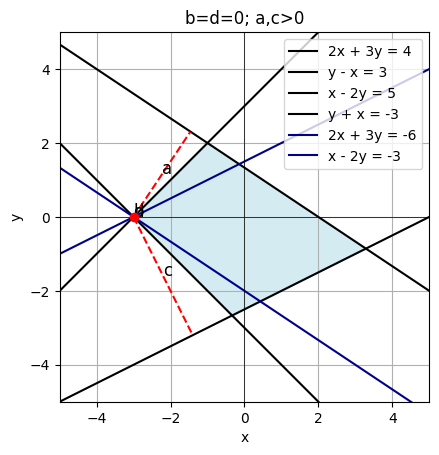

In [58]:
a1, b1, c1 = 2, 3, 4    # 2x + 3y = 4
a2, b2, c2 = -1, 1, 3   # y - x = 3
a3, b3, c3 = 1, -2, 5   # x - 2y = 5
a4, b4, c4 = 1, 1, -3   # y + x = -3

a5, b5, c5 = 2, 3, -6   # 2x + 3y = -6
a6, b6, c6 = 1, -2, -3  # x - 2y = -3

# Point rouge
x0 = -3
y0 = 0

# lambdas (coefficients de Lagrange de la minimisation)
l1 = 2*(a1*x0+b1*y0-c1)/(a1**2+b1**2)
l2 = 2*(a2*x0+b2*y0-c2)/(a2**2+b2**2)
l3 = 2*(a3*x0+b3*y0-c3)/(a3**2+b3**2)
l4 = 2*(a4*x0+b4*y0-c4)/(a4**2+b4**2)

x = np.linspace(-10, 10, 400)
y1 = (c1 - a1 * x) / b1       # y = (4 - 2x) / 3
y2 = (c2 - a2 * x) / b2       # y = x + 3
y3 = (c3 - a3 * x) / b3       # y = (x - 5) / 2
y4 = (c4 - a4 * x) / b4       # y = -3 - x
y5 = (c5 - a5 * x) / b5       # y = (-6 - 2x) / 3
y6 = (c6 - a6 * x) / b6       # y = (x + 3) / 2

plt.plot(x, y1, label="2x + 3y = 4", color='black')
plt.plot(x, y2, label="y - x = 3", color='black')
plt.plot(x, y3, label="x - 2y = 5", color='black')
plt.plot(x, y4, label="y + x = -3", color='black')
plt.plot(x, y5, label="2x + 3y = -6", color='darkblue')
plt.plot(x, y6, label="x - 2y = -3", color='darkblue')
plt.fill_between(x, np.minimum(y1, y2),
                 np.maximum(y3, y4), where=(y2 >= y4) & (y1 >= y3), color='lightblue', alpha=0.5)

# Ajouter le point (2,0) en rouge
plt.scatter(x0, y0, color='red', zorder=5)

# Tracer les lignes pointillées
# a
plt.plot([x0, x0-l1*a1/2], [y0, y0-l1*b1/2], 'r--')
plt.text(x0-l1*a1/4, y0-l1*b1/4, "a", fontsize=12, color='black')

# b
plt.plot([x0, x0-l2*a2/2], [y0, y0-l2*b2/2], 'r--')
plt.text(x0-l2*a2/4, y0-l2*b2/4, "b", fontsize=12, color='black')

# c
plt.plot([x0, x0-l3*a3/2], [y0, y0-l3*b3/2], 'r--')
plt.text(x0-l3*a3/4, y0-l3*b3/4, "c", fontsize=12, color='black')

# d
plt.plot([x0, x0-l4*a4/2], [y0, y0-l4*b4/2], 'r--')
plt.text(x0-l4*a4/4, y0-l4*b4/4, "d", fontsize=12, color='black')

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(r"b=d=0; a,c>0")
plt.grid(True)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Retenons que les variables d'écart ne sont pas égales à la distance du point $(x,y)$ à la frontière correspondante. En revanche, une variable d'écart est nulle si et seulement si le point $(x,y)$ est sur la frontière correspondante. Enfin, une variable d'écart est toujours positive: si les calculs font apparaître une variable d'écart $<0$, c'est une erreur de calcul et cela veut dire que le point correspondant est à l'extérieur du simplexe, ce qui n'a pas d'intérêt.

Revenons au calcul effectué précédemment:

$
\begin{bmatrix}
x \\
y \\
a \\
c
\end{bmatrix}
=\begin{bmatrix}
-3+\frac{1}{2}b+\frac{1}{2}d \\
-\frac{1}{2}b+\frac{1}{2}d \\
10+\frac{1}{2}b-\frac{5}{2}d \\
8-\frac{3}{2}b+\frac{1}{2}d
\end{bmatrix}
$

Par **convention**, pour un point $(x,y)$ donné, on écrit toujours les variables d'écart annulées (c'est-à-dire les variables d'écart dont les frontières correspondantes sont atteintes par le point $(x,y)$) à **droite** du système avec les constantes. Les autres variables ($x$, $y$ et les variables d'écart non nulles) sont mises à **gauche** du système est exprimées en fonction des variables annulées.

Typiquement, avec 4 inéquations et 6 variables (4 d'écart + 2 standard), on aura 4 variables à gauche et 2 variables annulées à droite. **En pratique, s'il y a strictement plus de deux variables d'écart nulles simultanément, rien ne change: on en choisit 2 à droite et l'autre est à gauche bien qu'elle soit nulle. Dans ce cas, on dit qu'on est dans un cas dégénéré.**

Mais pourquoi conserver les variables annulées alors qu'elles valent 0 ? De plus, pourquoi il y aurait-il équivalence entre "être à droite de l'équation" et "être annulée" ? Autrement dit, si on s'intéresse au cas où il n'y pas de variable annulée, que fait-on ?

Pour répondre à toutes ces questions, il faut d'abord se demander pourquoi on étudie cette notion de simplexe. En réalité on veut résoudre un problème d'optimisation du type:

$$ \text{Max} \ \alpha x+ \beta y $$

sous la contrainte des 4 inéquations données précédemment.

Par exemple, nous allons tenter de résoudre:

$$ \text{Max} \ x+3y $$

dans le simplexe que nous étudions depuis tout à l'heure.

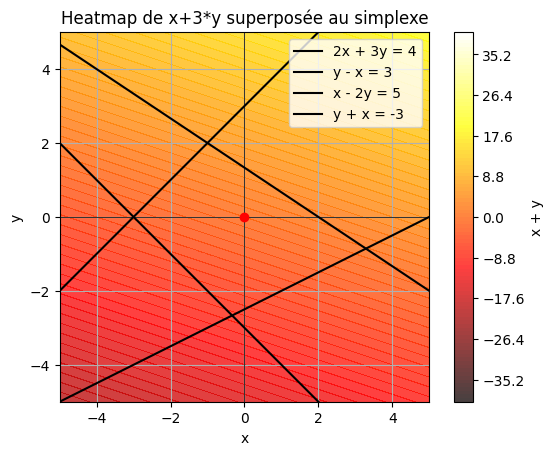

In [59]:
a1, b1, c1 = 2, 3, 4    # 2x + 3y = 4
a2, b2, c2 = -1, 1, 3   # y - x = 3
a3, b3, c3 = 1, -2, 5   # x - 2y = 5
a4, b4, c4 = 1, 1, -3   # y + x = -3

# Point rouge
x0 = 0
y0 = 0

x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
F = X + 3*Y

ineq1 = (2 * X + 3 * Y <= 4)
ineq2 = (-X + Y <= 3)
ineq3 = (X - 2 * Y <= 5)
ineq4 = (X + Y >= -3)
region = ineq1 & ineq2 & ineq3 & ineq4

plt.plot(x, (c1 - a1 * x) / b1, label="2x + 3y = 4", color='black')
plt.plot(x, (c2 - a2 * x) / b2, label="y - x = 3", color='black')
plt.plot(x, (c3 - a3 * x) / b3, label="x - 2y = 5", color='black')
plt.plot(x, (c4 - a4 * x) / b4, label="y + x = -3", color='black')
heatmap = plt.contourf(X, Y, F, levels=100, cmap='hot', alpha=0.75)
plt.contourf(X, Y, region, levels=[0.5, 1], colors='none', hatches=['', '//'], alpha=0)
plt.colorbar(heatmap, label="x + y")
plt.scatter(x0, y0, color='red', zorder=5)

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(r"Heatmap de x+3*y superposée au simplexe")
plt.grid(True)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Graphiquement, on voit que le point correspondant à $a=b=0$ est l'optimum de ce problème d'optimisation.

Remarque: l'algorithme du simplexe ne s'applique que lorsque la fonction objectif (càd la fonction à maximiser) est sous la forme:

$$\sum_{i=1}^{N} \alpha_{i}x_{i}$$

Avec une telle fonction objectif, l'optimum est toujours atteint en un (ou éventuellement plusieurs) sommet du simplexe. C'est ce qu'on a constaté sur la figure ci-dessus.

Mais imaginez un problème beaucoup plus complexe avec plus de variables: il devient très difficile de résoudre graphiquement. Dans ce cas, on ne peut se baser que sur le fait que l'optimum est atteint en un des sommets. On pourrait décider de calculer la fonction objectif en chaque sommet et prendre le maximum. Le problème, c'est que le nombre de sommets croît très vite quand le nombre de variables augmente ! Donc ce n'est pas une bonne idée.

L'idée de l'algorithme du simplexe est de partir d'un sommet (donc de l'annulation de 2 variables d'écart dans notre cas), et d'écrire la fonction objectif en fonction des variables d'écart annulées:

$$z=x+3y=-3+\frac{1}{2}b+\frac{1}{2}d-\frac{3}{2}b+\frac{3}{2}d=-3-b+2d$$

Ici, on constate que si on augmente $d$, la fonction objectif va augmenter. Mais à cause de l'égalité $a=10+\frac{1}{2}b-\frac{5}{2}d$, on ne peut augmenter $d$ que jusqu'à $4$. C'est ce qu'on fait $d=4$. Par conséquent, $a=0$.

Exprimons donc $x,y,c$ et $d$ en fonction de $a$ et $b$:



$2x+3y+a=4$ \
$y-x+b=3$ \
$x-2y+c=5$ \
$y+x-d=-3$ \
$a,b,c,d \geq 0$

Donc:

$
\begin{bmatrix}
2 & 3 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
1 & -2 & 0 & 1 \\
1 & 1 & -1 & 0
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
d \\
c
\end{bmatrix}
=\begin{bmatrix}
4-a \\
3-b \\
5 \\
-3
\end{bmatrix}
$

**Astuce:** vous remarquez qu'on a juste modifié la 3e colonne de la matrice de gauche et un peu modifié le vecteur à droite de l'équation. Pour aller plus vite plus tard:


*   Écrire matriciellement le système initial:\
$
\begin{bmatrix}
2 & 3 & 1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 1 & 0 & 0 \\
1 & -2 & 0 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 & 0 & -1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
a \\
b \\
c \\
d
\end{bmatrix}
=\begin{bmatrix}
4 \\
3 \\
5 \\
-3
\end{bmatrix}
$

*   Séparer la matrice entre les variables de "base" (c'est comme ça qu'on appelle les variables "à gauche" de l'équation) et les variables "hors base" (variables "à droite de l'équation", c'est-à-dire les variables dont l'écart est nul donc dont la frontière est "active" car le point est dessus):\
$
\begin{bmatrix}
2 & 3 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
1 & 1 & 0 & -1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
c \\
d
\end{bmatrix}
+\begin{bmatrix}
1 & 0 \\
0 & 1 \\
0 & 0 \\
0 & 0
\end{bmatrix}
\begin{bmatrix}
a \\
b
\end{bmatrix}
=\begin{bmatrix}
4 \\
3 \\
5 \\
-3
\end{bmatrix}
$

* Soustraire et inverser:\
$
\begin{bmatrix}
x \\
y \\
c \\
d
\end{bmatrix}
={\begin{bmatrix}
2 & 3 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
1 & 1 & 0 & -1
\end{bmatrix}}^{-1}\left(
\begin{bmatrix}
4 \\
3 \\
5 \\
-3
\end{bmatrix}
-\begin{bmatrix}
1 & 0 \\
0 & 1 \\
0 & 0 \\
0 & 0
\end{bmatrix}
\begin{bmatrix}
a \\
b
\end{bmatrix}\right)
$

* D'où: \
$
\begin{bmatrix}
x \\
y \\
c \\
d
\end{bmatrix}
=\begin{bmatrix}
1/5 & -3/5 & 0 & 0 \\
1/5 & 2/5 & 0 & 0 \\
1/5 & 7/5 & 1 & 0 \\
2/5 & -1/5 & 0 & -1
\end{bmatrix}\left(
\begin{bmatrix}
4 \\
3 \\
5 \\
-3
\end{bmatrix}
-\begin{bmatrix}
1 & 0 \\
0 & 1 \\
0 & 0 \\
0 & 0
\end{bmatrix}
\begin{bmatrix}
a \\
b
\end{bmatrix}\right)
$

* D'où: \

$
\begin{bmatrix}
x \\
y \\
c \\
d
\end{bmatrix}
=\begin{bmatrix}
1/5 & -3/5 & 0 & 0 \\
1/5 & 2/5 & 0 & 0 \\
1/5 & 7/5 & 1 & 0 \\
2/5 & -1/5 & 0 & -1
\end{bmatrix}
\begin{bmatrix}
4-a \\
3-b \\
5 \\
-3
\end{bmatrix}
$


* Donc: \

$
\begin{bmatrix}
x \\
y \\
c \\
d
\end{bmatrix}
=\begin{bmatrix}
-1-\frac{1}{5}a+\frac{3}{5}b \\
2-\frac{1}{5}a-\frac{2}{5}b \\
10-\frac{1}{5}a-\frac{7}{5}b \\
4-\frac{2}{5}a+\frac{1}{5}b
\end{bmatrix}
$

La fonction objectif vaut donc:

$$z=x+3y=5-\frac{4}{5}a-\frac{3}{5}b$$

On remarque que toute augmentation de $a$ ou $b$ entrainerait une diminution de la fonction objectif. Nous avons donc atteint l'optimum en $(-1,2)$ et il vaut $5$, et c'est cohérent avec la figure précédente.

**Vocabulaire:**

Les coefficients devant les variables hors base sont appelés "coûts réduits". Par exemple, le coût réduit de $a$ est $-\frac{4}{5}$. En maximisation, lorsque tous les coûts réduits sont négatifs, on a atteint l'optimum.

Pourquoi ? Cette propriété est directement reliée à la convexité du simplexe. On peut même se l'imaginer en 3D: la fonction objectif est linéaire en chaque variable, donc l'augmentation de la fonction se fait dans une seule direction possible et de manière graduelle, de sorte que lorsque nous nous trouvons sur un sommet donné, soit c'est l'optimum et aucun voisin n'est meilleur, soit ce n'est pas l'optimum et il existe un sommet voisin meilleur.

De manière géométrique, l'algorithme du simplexe consiste donc à aller de voisin en voisin, où deux sommets sont dits voisins s'ils sont caractérisés par les mêmes variables hors base sauf une.

**Remarque:** lorsque nous avons itéré une fois l'algorithme tout à l'heure, l'augmentation de $d$ a été bloquée par la contrainte $a \geq 0$. Si aucune équation ne bloquait l'augmentation de la variable $d$, on pourrait augmenter cette dernière jusqu'à $+∞$. Dans ce cas, le problème ne serait pas borné. L'algorithme de simplexe permet donc de détecter les cas non bornés.